<a href="https://colab.research.google.com/github/paulabhishek7777/UNP-C2C/blob/main/Assignment_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries 
import pandas as pd 
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/UNP C2C Assign 1 /airfoil_self_noise.dat", sep ="\t")

In [25]:
df 


,Frequency,Angle of attack,Chordlength,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [24]:
df.columns = ["Frequency", "Angle of attack", "Chordlength","Free-stream_velocity","Suction_side_displacement_thickness","Scaled_sound_pressure_level"]

In [6]:
df.shape

(1502, 6)

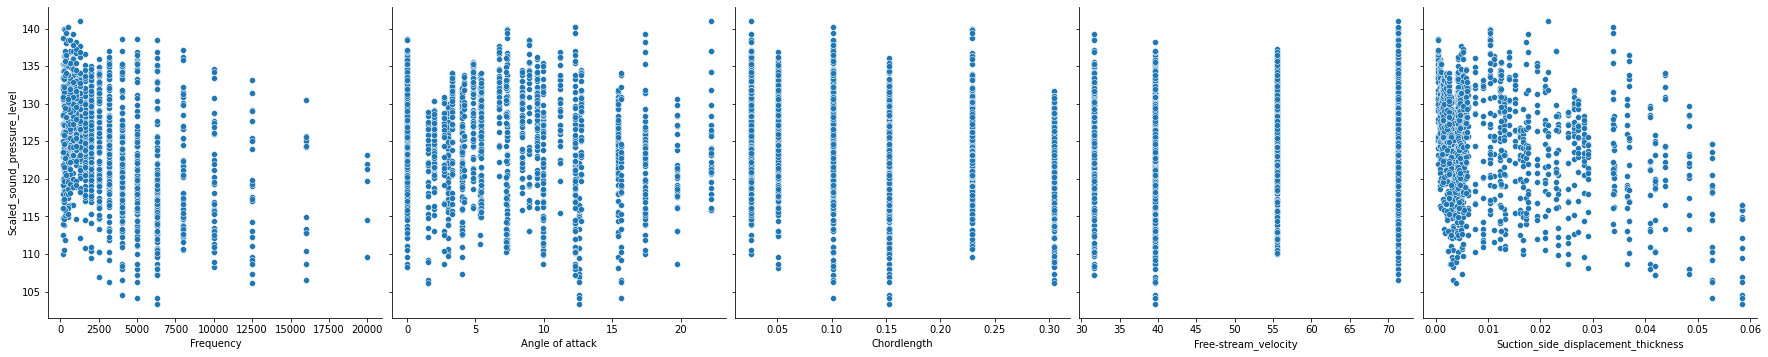

In [18]:
sns.pairplot(df, x_vars=["Frequency", "Angle of attack", "Chordlength","Free-stream_velocity","Suction_side_displacement_thickness"], y_vars="Scaled_sound_pressure_level",height = 5)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [22]:
featured_cols = ["Frequency", "Angle of attack", "Chordlength","Free-stream_velocity","Suction_side_displacement_thickness"]
x = df[featured_cols]
y = df.Scaled_sound_pressure_level
lm = LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

132.83000452463497
[-1.28254380e-03 -4.22067484e-01 -3.56740677e+01  9.99484704e-02
 -1.47291704e+02]


In [31]:
# let us use train test split method 
featured_cols = ["Frequency", "Angle of attack", "Chordlength","Free-stream_velocity","Suction_side_displacement_thickness"]
x = df[featured_cols]
y = df.Scaled_sound_pressure_level
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
lm1=LinearRegression()
lm1.fit(x_train,y_train)
y_pred = lm1.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.726064610746457


In [32]:
# excluding angle of attack
featured_cols = ["Frequency", "Chordlength","Free-stream_velocity","Suction_side_displacement_thickness"]
x = df[featured_cols]
y = df.Scaled_sound_pressure_level
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
lm1=LinearRegression()
lm1.fit(x_train,y_train)
y_pred = lm1.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.9630353468361506


In [35]:
# excluding chord length
featured_cols = ["Frequency", "Angle of attack", "Free-stream_velocity","Suction_side_displacement_thickness"]
x = df[featured_cols]
y = df.Scaled_sound_pressure_level
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
lm1=LinearRegression()
lm1.fit(x_train,y_train)
y_pred = lm1.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.408317451127992
